### QAOA for the Number Partitioning Problem

#### Installation and imports

In [11]:
import numpy as np
import scipy
import qiskit
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit as QC
from qiskit import QuantumRegister as QR
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.optimization.applications.ising import partition
from qiskit.optimization.applications.ising.common import read_numbers_from_file, sample_most_likely
from qiskit.aqua.algorithms import QAOA
from qiskit.aqua.components.optimizers import SLSQP, COBYLA, NELDER_MEAD, POWELL, TNC, L_BFGS_B, CG
from scipy.optimize import minimize

In [3]:
pip install pylatexenc

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


#### QAOA class for number partition 

In [7]:
class QAOA_number_partition:
    
    def __init__(self,
                 numbers, 
                 NUM_SHOTS=1000, 
                 backend='statevector_simulator', 
                 method='SLSQP', 
                 p=1):
        
        self.numbers = numbers           # Values from problem set to partition
        self.NUM_SHOTS = NUM_SHOTS       # Number of iterations
        self.backend = backend           # Defaulted to statevector_simulator
        self.method = method             # Optimisers like SLSQP, COBYLA, NELDER_MEAD, POWELL, TNC, L_BFGS_B, CG
        self.qubits = len(numbers)       # Number of qubits
        self.layer = p                   # Number of layers 
        
    def cost(self, params):
        qc = self.circuit(params)
        count_dist = execute(qc,                                         # Probability distribution 
                             Aer.get_backend("statevector_simulator"),
                             NUM_SHOTS=1000).result().get_counts()
        expectation = 0                                                  # Calculating expectation value
        for config, probability in count_dist.items():
            x = list(map(int, config))[::-1]
            energy = 0
            for i in range(self.qubits):
                for j in range(i):
                    energy += 2 * x[i] * self.numbers[i] * x[j] * self.numbers[j] 
            expectation += energy * probability
        return expectation
        
    def optimisation(self):
        parameters = 2 * np.pi * np.random.rand(self.layer * 2)  # randomly initialising between 0 to pi (control -> layer)
        
        # Optimising the parameters classically using scipy.optimize.minimize
        optimal = minimize(fun=self.cost, 
                           x0=parameters, 
                           method=self.method)
        return optimal
        
    def circuit(self, params):
        qc = QC(QR(self.qubits))               # Building the base circuit with qiskit 
        params = params.reshape(self.layer, 2) # Reshaping parameters to accommodate gamma and alpha according to layer
        for i in range(self.qubits):
            qc.h(i)                            # Initialising the qubits to a superposition state
            
        for layer in range(self.layer):        # Initialising the values of gamma and alpha according to layer
            gamma = params[layer, 0]
            alpha = params[layer, 1]
            
            # Cost function - U_C
            for i in range(self.qubits - 1):                                   # Unitary evolution for each pair of qubits
                for j in range(i + 1, self.qubits):
                    qc.cx(i, j)                                                # Control-X gate   
                    qc.rz(-4 * self.numbers[i] * self.numbers[j] * gamma, j)   # Rotation of each qubit by gamma about Z axis 
                    qc.cx(i, j)                                                # Control-X gate  
                    qc.barrier()

            # Mixer function - U_H
            for i in range(self.qubits):
                qc.rx(alpha, i)          # Rotation of each qubit by alpha about X axis 
        return qc

### QAOA class - Solution to the problem set and probability distribution histograms for p = 1, 2, 3

#### Different optimisers from _qiskit.aqua.components.optimizers_

In [18]:
methods = ['SLSQP', 'COBYLA', 'POWELL', 'TNC', 'CG']

#### Ideally, the accuracy of QAOA should increase with increase in the number of layers.

#### p = 1

number of layers: 1
problem         : [1 2 3 4]
solution        : [1 0 0 1]


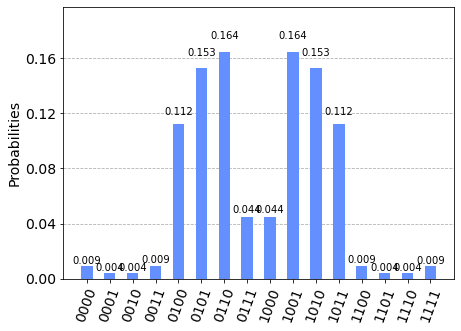

In [29]:
numbers = read_numbers_from_file('number-partitioning-problem-set') # numbers in the problem set can be inserted in this file
qaoa_class = QAOA_number_partition(numbers, 
                                   NUM_SHOTS=100, 
                                   method=method, 
                                   p=1)
res = qaoa_class.optimisation()                      # Optimises the parameters classically using scipy.optimize.minimize
params_optimal = res.x                               # Puts in optimal parameters 
circuit_optimal = qaoa_class.circuit(params_optimal) # Runs circuit with optimal parameters
count_dist = execute(circuit_optimal, 
                     Aer.get_backend("statevector_simulator"),
                     NUM_SHOTS=100).result().get_counts()
solution = sample_most_likely(count_dist)
print("number of layers:", 1)
print("problem         :", numbers)
print("solution        :", solution)

plot_histogram(count_dist) # Plots probability distribution histogram

#### p = 2

number of layers: 2
problem         : [1 2 3 4]
solution        : [1 0 0 1]


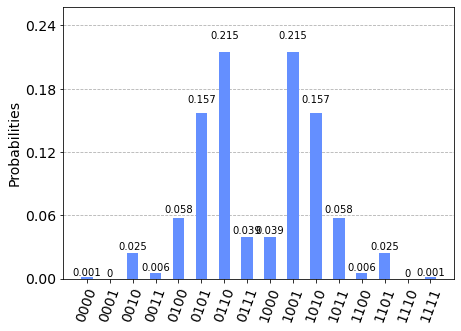

In [24]:
numbers = read_numbers_from_file('number-partitioning-problem-set')
qaoa_class = QAOA_number_partition(numbers, 
                                   NUM_SHOTS=1000, 
                                   method='SLSQP', 
                                   p=2)
res = qaoa_class.optimisation()                      # Optimises the parameters classically using scipy.optimize.minimize
params_optimal = res.x                               # Puts in optimal parameters
circuit_optimal = qaoa_class.circuit(params_optimal) # Runs circuit with optimal parameters
count_dist = execute(circuit_optimal, 
                     Aer.get_backend("statevector_simulator"),
                     NUM_SHOTS=1000).result().get_counts()
solution = sample_most_likely(count_dist)
print("number of layers:", 2)
print("problem         :", numbers)
print("solution        :", solution)

plot_histogram(count_dist) # Plots probability distribution histogram

#### p = 3

number of layers: 3
problem         : [1 2 3 4]
solution        : [1 0 0 1]


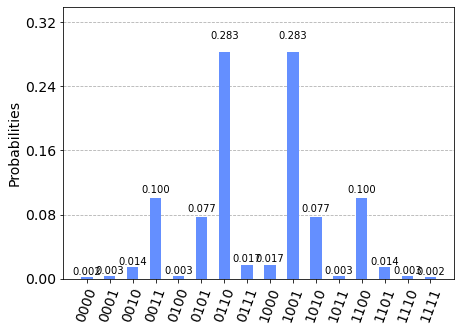

In [30]:
numbers = read_numbers_from_file('number-partitioning-problem-set')
qaoa_class = QAOA_number_partition(numbers, 
                                   NUM_SHOTS=1000, 
                                   method='SLSQP', 
                                   p=3)
res = qaoa_class.optimisation()                      # Optimises the parameters classically using scipy.optimize.minimize
params_optimal = res.x                               # Puts in optimal parameters
circuit_optimal = qaoa_class.circuit(params_optimal) # Runs circuit with optimal parameters
count_dist = execute(circuit_optimal, 
                     Aer.get_backend("statevector_simulator"),
                     NUM_SHOTS=1000).result().get_counts()
solution = sample_most_likely(count_dist)
print("number of layers:", 3)
print("problem         :", numbers)
print("solution        :", solution)

plot_histogram(count_dist) # Plots probability distribution histogram

### QAOA Aqua - Solution to the problem set and probability distribution histogram for p = 1, 2, 3

#### p = 1

number of layers: 1
problem         : [1 2 3 4]
solution        : [1 0 0 1]


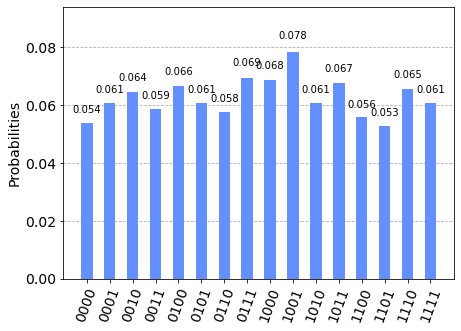

In [54]:
operator, constant_shift = partition.get_operator(numbers) # Generates number partitioning instances and converts
                                                           # them into a Hamiltonian (as a list of Pauli gates)
qaoa_aqua = QAOA(operator,
                 p=1,
                 quantum_instance=Aer.get_backend('qasm_simulator'))
aqua_res = qaoa_aqua.run(NUM_SHOTS=1000)
solution = sample_most_likely(aqua_res.eigenstate)

print("number of layers:", 1)
print("problem         :", numbers)
print("solution        :", solution)

plot_histogram(aqua_res.eigenstate) # Plots probability distribution histogram

#### p = 2

number of layers: 2
problem  : [1 2 3 4]
solution : [0 1 1 0]


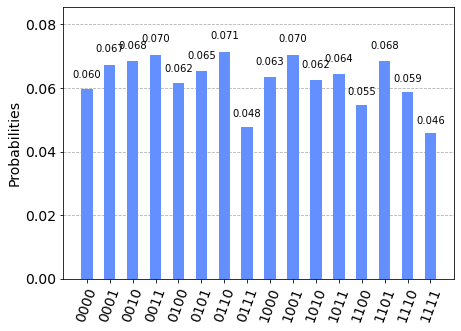

In [40]:
operator, constant_shift = partition.get_operator(numbers) # Generates number partitioning instances and converts
                                                           # them into a Hamiltonian (as a list of Pauli gates)
qaoa_aqua = QAOA(operator,
                 p=2,
                 quantum_instance=Aer.get_backend('qasm_simulator'))
aqua_res = qaoa_aqua.run(NUM_SHOTS=10000)
solution = sample_most_likely(aqua_res.eigenstate)

print("number of layers:", 2)
print("problem  :", numbers)
print("solution :", solution)

plot_histogram(aqua_res.eigenstate) # Plots probability distribution histogram

#### p = 3

number of layers: 3
problem  : [1 2 3 4]
solution : [0 1 1 0]


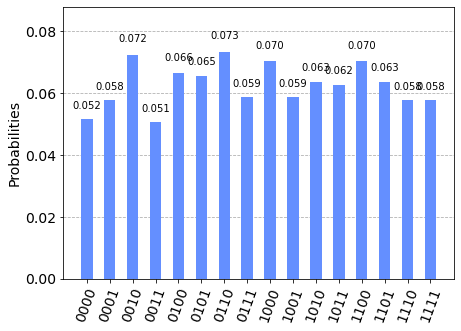

In [41]:
operator, constant_shift = partition.get_operator(numbers) # Generates number partitioning instances and converts
                                                           # them into a Hamiltonian (as a list of Pauli gates)
qaoa_aqua = QAOA(operator,
                 p=3,
                 quantum_instance=Aer.get_backend('qasm_simulator'))
aqua_res = qaoa_aqua.run(NUM_SHOTS=10000)
solution = sample_most_likely(aqua_res.eigenstate)

print("number of layers:", 3)
print("problem  :", numbers)
print("solution :", solution)

plot_histogram(aqua_res.eigenstate) # Plots probability distribution histogram